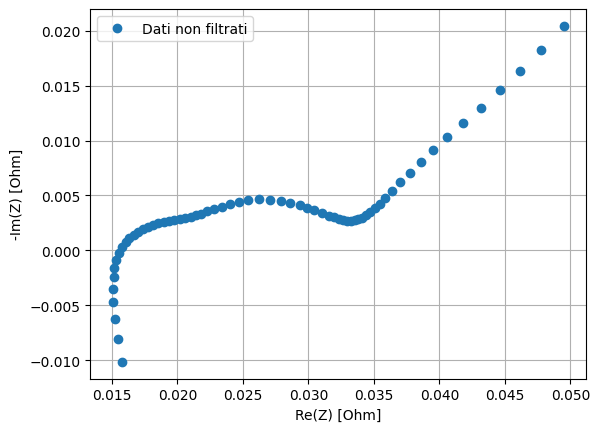

In [27]:
from impedance import preprocessing
import matplotlib.pyplot as plt

# Importa i dati dal file CSV
frequencies, Z = preprocessing.readCSV('./data.csv')

# Diagramma di Nyquist
plt.plot(Z.real, -Z.imag, 'o', label='Dati non filtrati')
plt.xlabel('Re(Z) [Ohm]')
plt.ylabel('-Im(Z) [Ohm]')
plt.legend()
plt.grid()
plt.show()

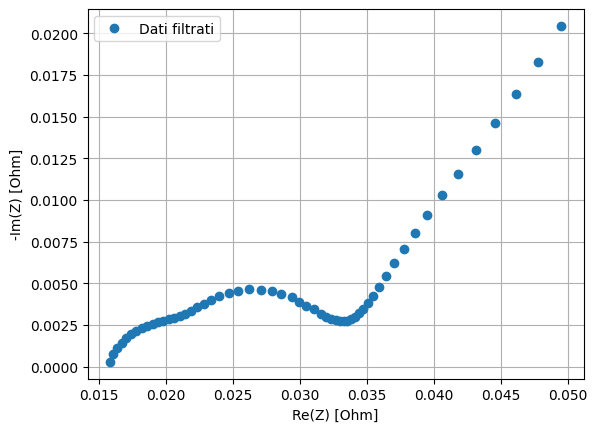

In [28]:
# Filtra i dati per mantenere solo il primo quadrante
frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)

# Diagramma di Nyquist
plt.plot(Z.real, -Z.imag, 'o',  label='Dati filtrati')
plt.xlabel('Re(Z) [Ohm]')
plt.ylabel('-Im(Z) [Ohm]')
plt.legend()
plt.grid()
plt.show()

from impedance.models.circuits import CustomCircuit

# Definizione del circuito equivalente
circuit_string = 'R0-p(R1,C1)-p(R2,C2)'

# Ipotesi iniziali per i parametri
initial_guess = [0.1, 0.1, 100, 0.1, 100]

# Creazione del circuito
circuit = CustomCircuit(circuit_string, initial_guess=initial_guess)

# Visualizzazione della struttura del circuito
print("Struttura del circuito:", circuit.circuit)

# Adattamento del circuito ai dati
circuit.fit(frequencies, Z)
print("Parametri stimati:", circuit.parameters_)

# Impedenza di adattamento
Z_fit = circuit.predict(frequencies)

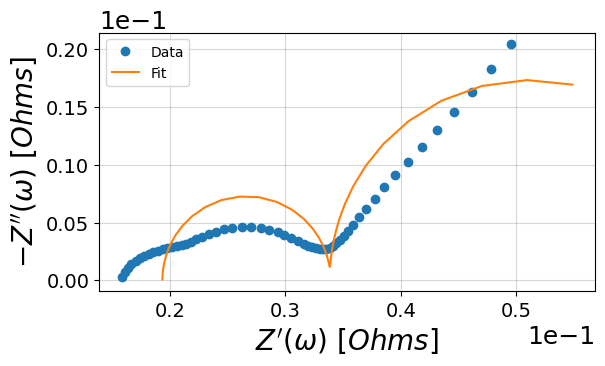

In [30]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist

fig, ax = plt.subplots()
plot_nyquist(Z, fmt='o', scale=10, ax=ax)
plot_nyquist(Z_fit, fmt='-', scale=10, ax=ax)

plt.legend(['Data', 'Fit'])
plt.show()

In [31]:
import numpy as np

# Calcolo dell'errore
error = Z - Z_fit
print("Errore medio:", np.mean(np.abs(error)))

Errore medio: 0.0024922074352614174


In [32]:
import pandas as pd

# Salvataggio dei parametri stimati e i dati adattati per future analisi
results = pd.DataFrame({'frequenze': frequencies, 'Z_real': Z.real, 'Z_imag': Z.imag, 'Z_fit_real': Z_fit.real, 'Z_fit_imag': Z_fit.imag})
results.to_csv('risultati_fit.csv', index=False)